## Train a custom CNN over Terrassa 900 dataset

In [1]:
!pip install visualkeras

  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/da/05/8912c901a3965ec7117d6cc33eaec3888c717611f72ce69d8be62a01d149/aggdraw-1.3.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.1 MB/s eta 0:00:00a 0:00:01


In [41]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
import visualkeras

# Define paths
base_path = '/kaggle/input/tb2019/tb2019/'
train_images_path = os.path.join(base_path, 'train', 'images')
validation_images_path = os.path.join(base_path, 'val', 'images')
test_images_path = os.path.join(base_path, 'test', 'images')
annotation_path_test = os.path.join(base_path, 'test', 'annotation.txt')
annotation_path_train = os.path.join(base_path, 'train', 'annotation.txt')
annotation_path_val = os.path.join(base_path, 'val', 'annotation.txt')

# Load annotations
annotations_train = pd.read_csv(annotation_path_train, sep='\t', header=None, names=['ImageID', 'ClassID'])
annotations_val = pd.read_csv(annotation_path_val, sep='\t', header=None, names=['ImageID', 'ClassID'])
annotations_test = pd.read_csv(annotation_path_test, sep='\t', header=None, names=['ImageID', 'ClassID'])

# Preprocess function
def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image
    image = cv2.resize(image, (224, 224))
    return img_to_array(image)

# Load and preprocess images
def load_images_and_labels(image_paths, annotations):
    images = []
    labels = []
    for image_name in os.listdir(image_paths):
        image_path = os.path.join(image_paths, image_name)
        if os.path.isfile(image_path):
            # Remove file extension (.jpg, .png, etc.) from image_name
            image_name_without_extension = os.path.splitext(image_name)[0]
            # Check if the image (without extension) has a corresponding label in the annotations
            if image_name_without_extension in annotations['ImageID'].values:
                images.append(preprocess_image(image_path))
                label = annotations[annotations['ImageID'] == image_name_without_extension]['ClassID'].values[0]
                labels.append(label)
            else:
                print(f"Warning: No label found for image {image_name}. Skipping this image.")
    return np.array(images), np.array(labels)

# Load training, validation, and testing data
X_train, y_train = load_images_and_labels(train_images_path, annotations_train)
X_val, y_val = load_images_and_labels(validation_images_path, annotations_val)
X_test, y_test = load_images_and_labels(test_images_path, annotations_test)

label_encoder = LabelEncoder()
y_train_ = label_encoder.fit_transform(y_train)
y_val_ = label_encoder.transform(y_val)
y_test_ = label_encoder.transform(y_test)

# Convert labels to categorical
y_train = to_categorical(y_train_)
y_val = to_categorical(y_val_)
y_test = to_categorical(y_test_)

# Normalize pixel values to be between 0 and 1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (2061, 224, 224, 3)
Validation data shape: (820, 224, 224, 3)
Test data shape: (1245, 224, 224, 3)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[[0.27450982, 0.40392157, 0.6       ],
        [0.27450982, 0.40784314, 0.60784316],
        [0.28627452, 0.41568628, 0.6117647 ],
        ...,
        [0.22352941, 0.34509805, 0.5294118 ],
        [0.23921569, 0.34509805, 0.5294118 ],
        [0.24705882, 0.34117648, 0.5294118 ]],

       [[0.28627452, 0.4117647 , 0.6156863 ],
        [0.2901961 , 0.41960785, 0.61960787],
        [0.29803923, 0.42745098, 0.627451  ],
        ...,
        [0.22352941, 0.34509805, 0.5294118 ],
        [0.23921569, 0.34509805, 0.5294118 ],
        [0.23921569, 0.34509805, 0.5294118 ]],

       [[0.2784314 , 0.41960785, 0.61960787],
        [0.28627452, 0.42352942, 0.627451  ],
        [0.2901961 , 0.43137255, 0.6313726 ],
        ...,
        [0.22745098, 0.34901962, 0.53333336],
        [0.24313726, 0.34901962, 0.53333336],
        [0.24313726, 0.34901962, 0.53333336]],

       ...,

       [[0.10196079, 0.14117648, 0.1882353 ],
        [0.10196079, 0.14117648, 0.1882353 ],
        [0.10196079, 0

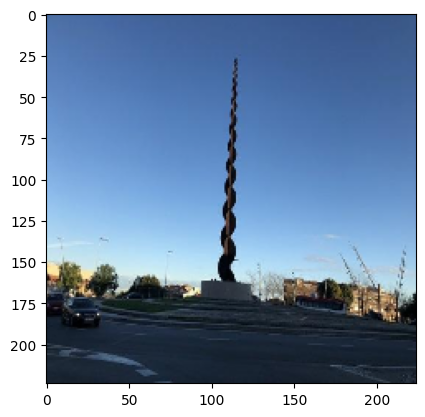

In [42]:
import matplotlib.pyplot as plt
# X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

plt.imshow(X_val[1])
print(y_val[1])
X_val[1]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_40 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_42 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

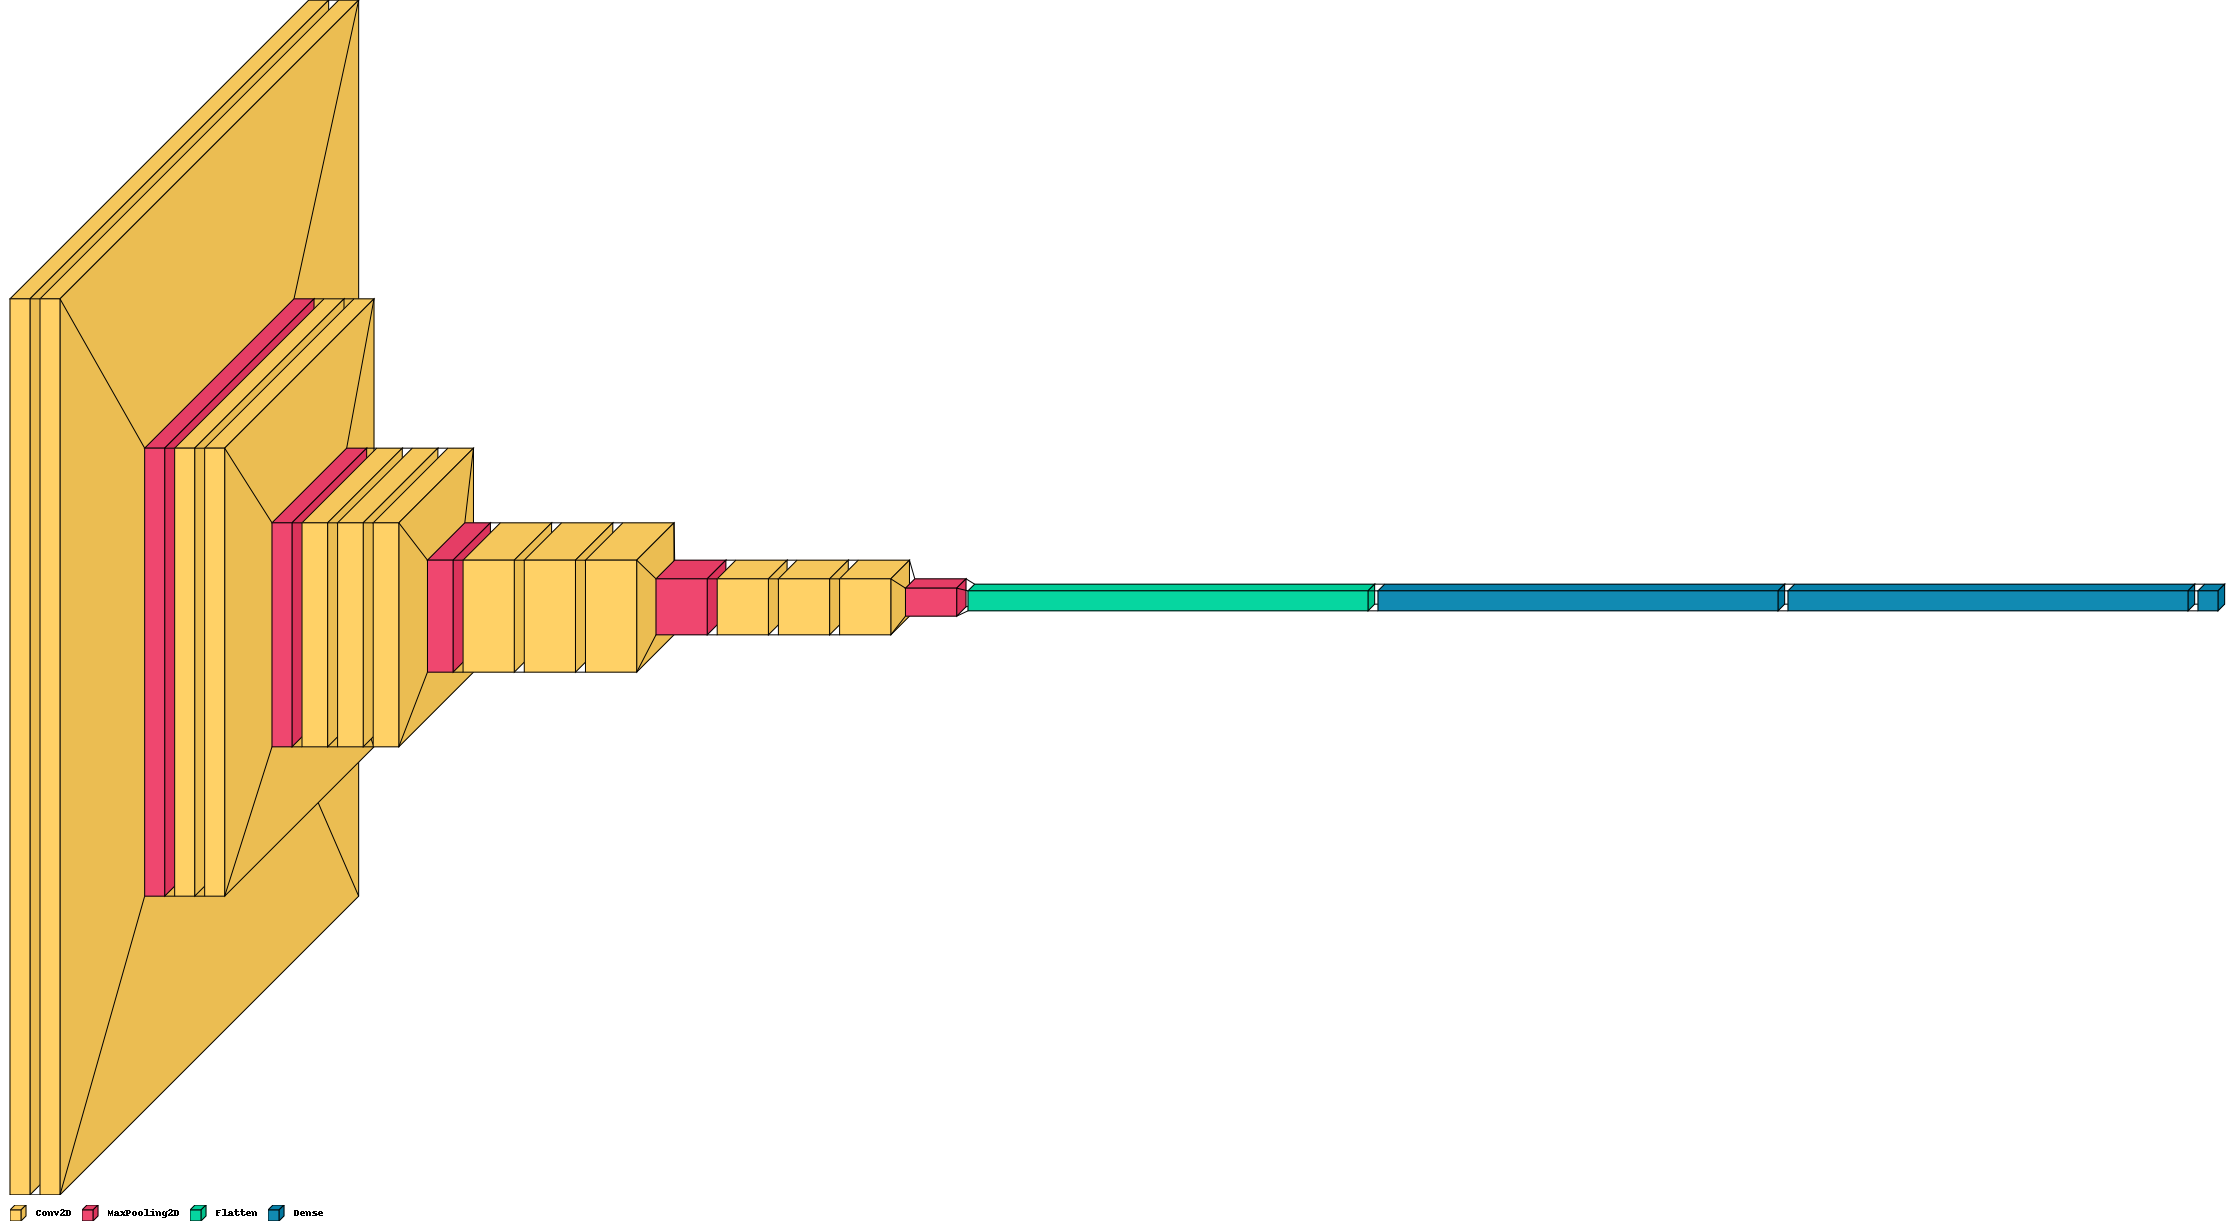

In [59]:
from tensorflow.keras import layers, models, regularizers

OUTPUT_CLASSES = 13 
L2_REG = 0.001  # L2 Regularization Factor

model = models.Sequential()

# Convolutional base
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(OUTPUT_CLASSES, activation='softmax'))

# Model summary
model.summary()


# Visualizing the model architecture
import visualkeras
visualkeras.layered_view(model, legend=True)


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train, X_val are numpy arrays of image data
# and y_train_indices, y_val_indices are numpy arrays of labels

train_datagen = ImageDataGenerator(    
    rotation_range=20,        # Degree range for random rotations
    width_shift_range=0.2,    # Range for horizontal shifts
    height_shift_range=0.2,   # Range for vertical shifts
    shear_range=0.2,          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,           # Range for random zoom
    horizontal_flip=True,     # Randomly flip inputs horizontally
    fill_mode='nearest'       # Strategy for filling in newly created pixels
)

val_datagen = ImageDataGenerator()

y_train_indices = np.argmax(y_train, axis=1)
y_val_indices = np.argmax(y_val, axis=1)

train_generator = train_datagen.flow(X_train, y_train_indices, batch_size=64)
val_generator = val_datagen.flow(X_val, y_val_indices, batch_size=64)

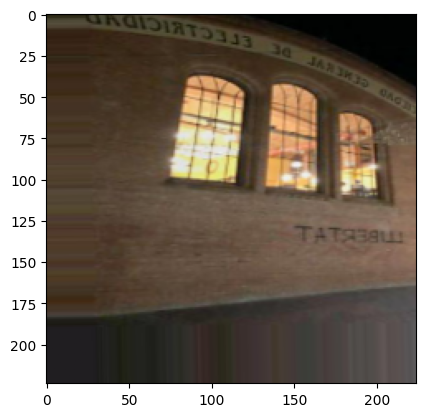

In [66]:
plt.imshow(train_generator[0][0][0])

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD

learning_rate = 0.01

# Create the optimizer with the custom learning rate
custom_optimizer = SGD(learning_rate=learning_rate)

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data=val_generator,
                    callbacks=[early_stopping])

Epoch 1/50
33/33 [==============================] - 32s 908ms/step - loss: 2.3006 - accuracy: 0.2707 - val_loss: 2.2208 - val_accuracy: 0.2890
Epoch 2/50
33/33 [==============================] - 30s 880ms/step - loss: 2.3229 - accuracy: 0.2780 - val_loss: 2.2288 - val_accuracy: 0.2890
Epoch 3/50
33/33 [==============================] - 31s 917ms/step - loss: 2.2784 - accuracy: 0.2814 - val_loss: 2.2207 - val_accuracy: 0.2890
Epoch 4/50
33/33 [==============================] - 31s 927ms/step - loss: 2.2798 - accuracy: 0.2737 - val_loss: 2.2063 - val_accuracy: 0.2841
Epoch 5/50
33/33 [==============================] - 32s 976ms/step - loss: 2.2563 - accuracy: 0.2858 - val_loss: 2.1843 - val_accuracy: 0.2878
Epoch 6/50
33/33 [==============================] - 32s 944ms/step - loss: 2.2491 - accuracy: 0.2785 - val_loss: 2.1604 - val_accuracy: 0.2939
Epoch 7/50
33/33 [==============================] - 32s 949ms/step - loss: 2.2312 - accuracy: 0.2940 - val_loss: 2.1533 - val_accuracy: 0.2915

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Feature extractor: Train a custom CNN over CIFAR-10

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models

# Load CIFAR-10 data
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

# Normalize pixel values
cifar10_x_train, cifar10_x_test = cifar10_x_train / 255.0, cifar10_x_test / 255.0

# Define the specific CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)  # CIFAR-10 has 10 classes
])



# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(cifar10_x_train, cifar10_y_train, epochs=50, validation_data=(cifar10_x_test, cifar10_y_test), callbacks=[early_stopping])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
# Remove the last two layers (dropout and output layer) and freeze all remaining layers
feature_extractor = models.Sequential(model.layers[:-2])
for layer in feature_extractor.layers:
    layer.trainable = False

# Add a new output layer for the Terrassa 900 dataset
n_classes = OUTPUT_BUILDINGS  # Replace with the actual number of classes in Terrassa 900
feature_extractor.add(layers.Dense(1024, activation='softmax'))
feature_extractor.add(layers.Dense(n_classes, activation='softmax'))

# Show the modified model summary
feature_extractor.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

def resize_images(images, size=(32, 32)):
    resized_images = np.array([img_to_array(array_to_img(im, scale=False).resize(size)) for im in images])
    return resized_images

# Resize Terrassa 900 dataset images
terrassa_X_train_resized = resize_images(X_train)
terrassa_X_val_resized = resize_images(X_val)

# Normalize the resized training and validation images
terrassa_X_train_resized = terrassa_X_train_resized / 255.0
terrassa_X_val_resized = terrassa_X_val_resized / 255.0

terrassa_train_generator = train_datagen.flow(terrassa_X_train_resized, y_train_indices, batch_size=256)
terrassa_val_generator = val_datagen.flow(terrassa_X_val_resized, y_val_indices, batch_size=256)

feature_extractor.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',  # Adjust depending on label format
                          metrics=['accuracy'])

# Train the model (only the new output layer will be trained)
history_terrassa = feature_extractor.fit(terrassa_train_generator, epochs=50, validation_data=(terrassa_val_generator))

In [ ]:
# Remove the last two layers (dropout and output layer) and freeze all remaining layers
from sklearn.svm import SVC

feature_extractor = models.Sequential(model.layers[:-1])
for layer in feature_extractor.layers:
    layer.trainable = False

    
features_train = feature_extractor.predict(terrassa_X_train_resized)
features_val = feature_extractor.predict(terrassa_X_val_resized)

# Flatten the output for SVM
features_train_flattened = features_train.reshape(features_train.shape[0], -1)
features_val_flattened = features_val.reshape(features_val.shape[0], -1)

# Initialize and train the SVM
svm_classifier = SVC(kernel='linear')  # You can choose and tune different kernels and parameters
svm_classifier.fit(features_train_flattened, y_train_indices)

# Evaluate the SVM
accuracy_train = svm_classifier.score(features_train_flattened, y_train_indices)
accuracy_val = svm_classifier.score(features_val_flattened, y_val_indices)

print(f"Training Accuracy: {accuracy_train}")
print(f"Validation Accuracy: {accuracy_val}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import layers, models

# Assuming feature_extractor and dataset preparation are done as before

# Extract features using the feature_extractor
features_train = feature_extractor.predict(terrassa_X_train_resized)
features_val = feature_extractor.predict(terrassa_X_val_resized)

# Flatten the output for Random Forest
features_train_flattened = features_train.reshape(features_train.shape[0], -1)
features_val_flattened = features_val.reshape(features_val.shape[0], -1)

# Initialize and train the Random Forest
rf_classifier = RandomForestClassifier()  # You can set parameters like n_estimators, max_depth, etc.
rf_classifier.fit(features_train_flattened, y_train_indices)

# Evaluate the Random Forest
accuracy_train = rf_classifier.score(features_train_flattened, y_train_indices)
accuracy_val = rf_classifier.score(features_val_flattened, y_val_indices)

print(f"Training Accuracy: {accuracy_train}")
print(f"Validation Accuracy: {accuracy_val}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_terrassa.history['loss'], label='Training Loss')
plt.plot(history_terrassa.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_terrassa.history['accuracy'], label='Training Accuracy')
plt.plot(history_terrassa.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
val_loss, val_accuracy = feature_extractor.evaluate(terrassa_val_generator)
print(f'Validation Accuracy: {val_accuracy}')

## Tercera parte

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 without the top layer
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers except the last 2 layers
for layer in vgg16.layers[:-2]:
    layer.trainable = False

# Create a new model and add new layers on top
model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(OUTPUT_BUILDINGS, activation='softmax'))  # OUTPUT_BUILDINGS: number of classes in Terrassa 900

# Model summary
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=(val_generator),
    callbacks=[early_stopping]
)

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze early layers
for layer in base_model.layers[:-4]:  # Freezing all but the last 4 layers
    layer.trainable = False

# Add new custom layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # num_classes should be set to the number of your classes
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/uos-building/dataset',
    target_size=(224, 224),
    batch_size=256,
    class_mode='sparse')

# Train the model
history = model.fit(train_generator, epochs=50, callbacks=[early_stopping])  # Set the number of epochs as needed

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

terrassa_X_train_resized = resize_images(X_train, (224, 224))
terrassa_X_val_resized = resize_images(X_val, (224, 224))

# Normalize the resized training and validation images
terrassa_X_train_resized = terrassa_X_train_resized / 255.0
terrassa_X_val_resized = terrassa_X_val_resized / 255.0


# Assuming train_datagen and val_datagen are defined with the necessary preprocessing
terrassa_train_generator = train_datagen.flow(terrassa_X_train_resized, y_train_indices, batch_size=256)
terrassa_val_generator = val_datagen.flow(terrassa_X_val_resized, y_val_indices, batch_size=256)

In [ ]:
x_batch, y_batch = next(terrassa_train_generator)
print("Batch shape:", x_batch.shape)  # This will give you the shape of the images
print("Labels shape:", y_batch.shape)  # This will give you the shape of the labels

In [ ]:
# Reconstruct the model without the last layer
mod = models.Sequential(model.layers[:-1]) 

new_model = models.Sequential([
    mod,       # VGG16 base model
    layers.Dense(13, activation='softmax')  # New output layer for 13 classes
])

new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_new = new_model.fit(terrassa_train_generator, epochs=50, validation_data=(terrassa_val_generator), callbacks=[early_stopping])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()